In [25]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# Create a set of random latitude and longitude combinations>
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [27]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [28]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

85.94806232281996 -160.80032551297262
82.04250491474085 -50.107375447032894
6.924247656080922 7.841085180207585
-43.9865650563977 148.753484974198
60.02330362718607 147.992851963519
45.577678679872974 -43.416647452154734
60.22323461068706 -117.90158933377938
7.106747546718736 57.256390549787056
-71.93540396279903 131.26012021127343
8.573354931649021 125.38546718014163
-55.10332808085938 43.065088210586225
2.3046917285557953 120.99286071259183
-10.546541730824927 -120.03348182997536
39.86493887152503 52.055368208335864
41.664521554579665 -65.44037468552155
62.5535682149891 162.566805365515
-6.654385897342252 116.35333766444359
-49.23951888619396 -0.2935845056676669
49.85030050951758 -87.89843037285281
-71.59238470751238 153.49063834731356
-62.669556866463786 -178.82428754105158
19.558239672121204 139.24941904437776
34.001312934448734 -2.8728788763694695
84.82062608627112 -15.638228036769306
67.33654145557753 -31.525469668786968
-24.06012668808897 -80.17324489888327
59.208162897335285 85

64.25497988730149 121.25137754625314
-24.671449705809962 65.25277433439547
-64.94581571983744 -85.76266502878545
-52.48563639505369 -37.15045564635281
-40.711331865892205 -50.03661510240903
-79.83082698310781 141.63579237349177
53.86287078377268 19.02515030920918
-29.504447872417337 87.38138871481607
-51.88731731915886 -128.65031966065771
88.86210937119327 159.05400140664761
-49.29336062398528 -137.30285816954077
39.19048497579658 -79.75113102792815
-17.144593554928335 74.96410134877587
-70.33620371792598 -85.41229170694932
79.04176870894531 43.91152457150798
19.22645567558672 -93.13381671330428
-79.4591410019182 -120.92278097927179
4.91876808151909 -75.87493842360381
-75.35566550154951 -149.21318216633213
-62.3119211583951 -112.97791123697996
-48.35880535791254 -155.22711191564142
-34.249653492288296 -86.10004268599373
-60.592958712681934 97.92663202621208
47.15480926622317 -16.17224783156351
-4.992180969127077 -151.2032040151601
81.49409325050155 40.3030271758781
48.700279942648706 3

In [29]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [30]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [31]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [32]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [34]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [35]:
# Create an empty list to hold the weather data.
city_data = []
# Print th beginning of the logging.
print("Beginning Data Retrieval   ")
print("---------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval   
---------------------------
Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | upernavik
Processing Record 3 of Set 1 | eha amufu
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | ust-omchug
Processing Record 6 of Set 1 | torbay
Processing Record 7 of Set 1 | high level
Processing Record 8 of Set 1 | bandarbeyla
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | kalabugao
City not found. Skipping...
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | gorontalo
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | gurgan
City not found. Skipping...
Processing Record 15 of Set 1 | shelburne
Processing Record 16 of Set 1 | ossora
Processing Record 17 of Set 1 | singaraja
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | geraldton
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | a

Processing Record 42 of Set 4 | zhigansk
Processing Record 43 of Set 4 | lisala
Processing Record 44 of Set 4 | lakes entrance
Processing Record 45 of Set 4 | ko samui
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | nemuro
Processing Record 48 of Set 4 | icod de los vinos
Processing Record 49 of Set 4 | egvekinot
Processing Record 50 of Set 4 | nurota
Processing Record 1 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 2 of Set 5 | lorengau
Processing Record 3 of Set 5 | iisalmi
Processing Record 4 of Set 5 | codrington
Processing Record 5 of Set 5 | taburi
City not found. Skipping...
Processing Record 6 of Set 5 | beringovskiy
Processing Record 7 of Set 5 | taburao
City not found. Skipping...
Processing Record 8 of Set 5 | jarvakandi
Processing Record 9 of Set 5 | luderitz
Processing Record 10 of Set 5 | cayenne
Processing Record 11 of Set 5 | manzanillo
Processing Record 12 of Set 5 | aden
Processing Record 13 of Set 5 | saskylakh
Pro

Processing Record 29 of Set 8 | san juan
Processing Record 30 of Set 8 | hoquiam
Processing Record 31 of Set 8 | nome
Processing Record 32 of Set 8 | narasannapeta
Processing Record 33 of Set 8 | caborca
Processing Record 34 of Set 8 | dabat
Processing Record 35 of Set 8 | assare
Processing Record 36 of Set 8 | gumdag
Processing Record 37 of Set 8 | bubaque
Processing Record 38 of Set 8 | hasaki
Processing Record 39 of Set 8 | ulladulla
Processing Record 40 of Set 8 | paytug
City not found. Skipping...
Processing Record 41 of Set 8 | parana
Processing Record 42 of Set 8 | cherskiy
Processing Record 43 of Set 8 | tocopilla
Processing Record 44 of Set 8 | litovko
Processing Record 45 of Set 8 | nola
Processing Record 46 of Set 8 | suyo
Processing Record 47 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 48 of Set 8 | omsukchan
Processing Record 49 of Set 8 | namibe
Processing Record 50 of Set 8 | bowen
Processing Record 1 of Set 9 | hovd
Processing Record 2 of Set 9 | p

Processing Record 18 of Set 12 | regina
Processing Record 19 of Set 12 | richards bay
Processing Record 20 of Set 12 | luganville
Processing Record 21 of Set 12 | sierra vista
Processing Record 22 of Set 12 | trat
Processing Record 23 of Set 12 | bilibino
Processing Record 24 of Set 12 | barawe
City not found. Skipping...
Processing Record 25 of Set 12 | taber
Processing Record 26 of Set 12 | nouakchott
Processing Record 27 of Set 12 | itupiranga
Processing Record 28 of Set 12 | naze
Processing Record 29 of Set 12 | constitucion
Processing Record 30 of Set 12 | matagami
Processing Record 31 of Set 12 | broome
Processing Record 32 of Set 12 | peniche
Processing Record 33 of Set 12 | sola
Processing Record 34 of Set 12 | adwa
Processing Record 35 of Set 12 | kloulklubed
Processing Record 36 of Set 12 | arlit
Processing Record 37 of Set 12 | neunkirchen
Processing Record 38 of Set 12 | goderich
Processing Record 39 of Set 12 | haapu
City not found. Skipping...
Processing Record 40 of Set 

In [36]:
len(city_data)

577

In [50]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,37.42,93,0,21.85,US,2022-09-18 21:45:38
1,Upernavik,72.7868,-56.1549,37.24,73,100,2.59,GL,2022-09-18 21:45:38
2,Eha Amufu,6.6592,7.7596,81.01,95,95,6.51,NG,2022-09-18 21:45:39
3,Hobart,-42.8794,147.3294,51.26,79,75,11.50,AU,2022-09-18 21:43:44
4,Ust-Omchug,61.1500,149.6333,40.91,48,100,2.71,RU,2022-09-18 21:45:39
5,Torbay,47.6666,-52.7314,53.76,70,40,19.57,CA,2022-09-18 21:45:40
6,High Level,58.5169,-117.1360,51.91,100,100,3.44,CA,2022-09-18 21:45:39
7,Bandarbeyla,9.4942,50.8122,76.46,86,10,19.98,SO,2022-09-18 21:45:40
8,New Norfolk,-42.7826,147.0587,50.92,71,100,4.00,AU,2022-09-18 21:45:41
9,East London,-33.0153,27.9116,59.58,87,100,6.44,ZA,2022-09-18 21:45:41


In [51]:
new_column_order =["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2022-09-18 21:45:38,71.2906,-156.7887,37.42,93,0,21.85
1,Upernavik,GL,2022-09-18 21:45:38,72.7868,-56.1549,37.24,73,100,2.59
2,Eha Amufu,NG,2022-09-18 21:45:39,6.6592,7.7596,81.01,95,95,6.51
3,Hobart,AU,2022-09-18 21:43:44,-42.8794,147.3294,51.26,79,75,11.50
4,Ust-Omchug,RU,2022-09-18 21:45:39,61.1500,149.6333,40.91,48,100,2.71


In [52]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [53]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

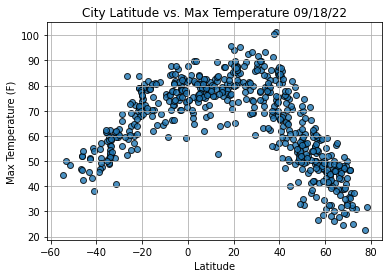

In [54]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

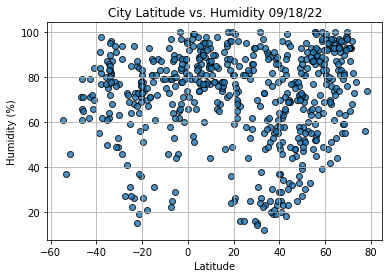

In [55]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

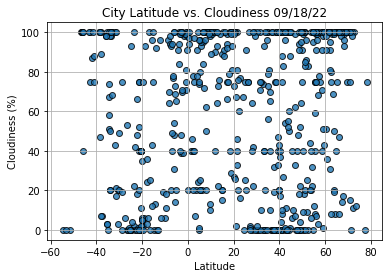

In [56]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

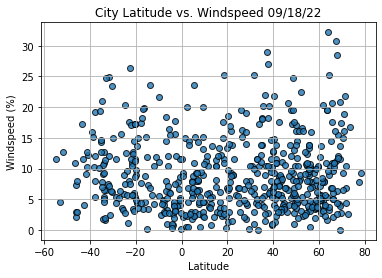

In [57]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Windspeed "+ time.strftime("%x"))
plt.ylabel("Windspeed (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

In [58]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [59]:
index13 = city_data_df.loc[13]
index13

City                       Ossora
Country                        RU
Date          2022-09-18 21:45:43
Lat                       59.2353
Lng                      163.0719
Max Temp                    46.71
Humidity                       49
Cloudiness                      1
Wind Speed                   4.45
Name: 13, dtype: object

In [60]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
       ...  
572     True
573     True
574     True
575     True
576     True
Name: Lat, Length: 577, dtype: bool

In [61]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2022-09-18 21:45:38,71.2906,-156.7887,37.42,93,0,21.85
1,Upernavik,GL,2022-09-18 21:45:38,72.7868,-56.1549,37.24,73,100,2.59
2,Eha Amufu,NG,2022-09-18 21:45:39,6.6592,7.7596,81.01,95,95,6.51
4,Ust-Omchug,RU,2022-09-18 21:45:39,61.1500,149.6333,40.91,48,100,2.71
5,Torbay,CA,2022-09-18 21:45:40,47.6666,-52.7314,53.76,70,40,19.57
...,...,...,...,...,...,...,...,...,...
572,Kahului,US,2022-09-18 21:59:49,20.8947,-156.4700,86.97,73,67,14.00
573,Dongsheng,CN,2022-09-18 22:01:54,39.8161,109.9776,57.11,37,100,12.91
574,Palana,RU,2022-09-18 22:01:55,59.1167,159.9667,42.17,64,51,6.20
575,Inirida,CO,2022-09-18 22:01:55,3.8653,-67.9239,80.46,83,78,2.64


In [62]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

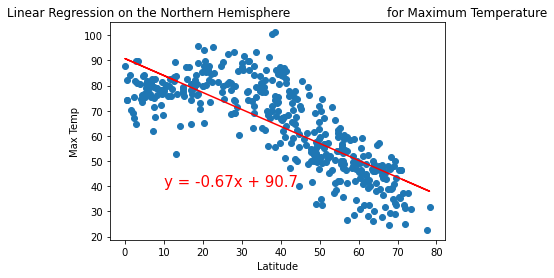

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

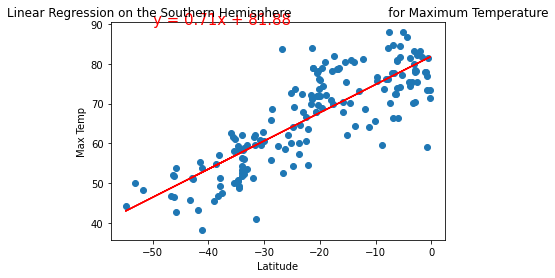

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

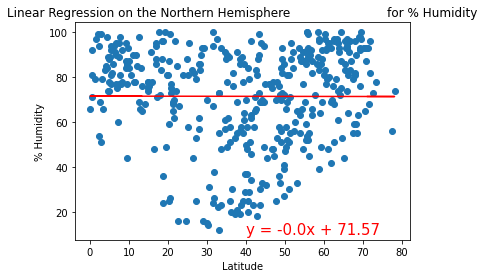

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

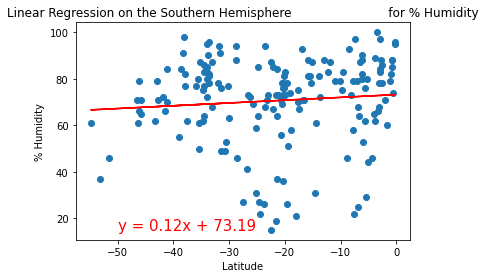

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,Cloudiness
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

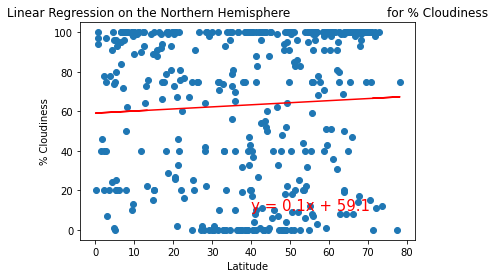

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

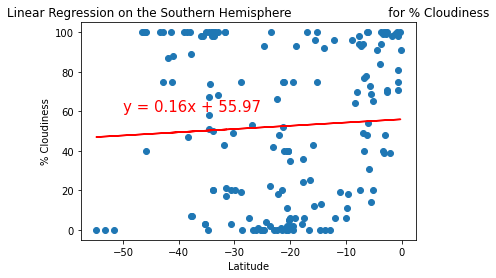

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))